In [2]:
from __future__ import print_function, division
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision.transforms as transforms
import numpy as np
import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
torch.manual_seed(0)
np.random.seed(0)

plt.ion() 

In [3]:
data_dir = '/home/prerona/Projects/CV_resources_and_assignments_COL780/data/train_last'
data_dir_test = '/home/prerona/Projects/CV_resources_and_assignments_COL780/data/test'
def load_split_train_test(datadir, valid_size = .2):
    train_transforms = transforms.Compose([
                                       transforms.ToTensor()
                                       ])
    test_transforms = transforms.Compose([
                                      transforms.ToTensor()
                                      ])
    train_data = datasets.ImageFolder(datadir,       
                    transform=train_transforms)
    test_data = datasets.ImageFolder(datadir,
                    transform=test_transforms)
    num_train = len(train_data)
    print(num_train)
    indices = list(range(num_train))
    split = int(np.floor(valid_size * num_train))
    np.random.shuffle(indices)
    from torch.utils.data.sampler import SubsetRandomSampler
    train_idx, test_idx = indices[split:], indices[:split]
    train_sampler = SubsetRandomSampler(train_idx)
    test_sampler = SubsetRandomSampler(test_idx)
    trainloader = torch.utils.data.DataLoader(train_data,
                   sampler=train_sampler, batch_size=8)
    testloader = torch.utils.data.DataLoader(test_data,
                   sampler=test_sampler, batch_size=8)
    return trainloader, testloader, num_train
trainloader, testloader, num_train_data_set = load_split_train_test(data_dir, .2)
_, testloader2, num_train_data_set2 = load_split_train_test(data_dir_test, .9)
print(trainloader.dataset.classes)
classes = trainloader.dataset.classes
num_train_data_set2

6010
2740
['next', 'prev', 'stop']


2740

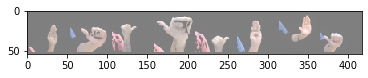

 stop  prev  next  prev  next  stop  stop  prev


In [4]:



# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(8)))

In [5]:
class Net(nn.Module):
    def __init__(self):
        torch.manual_seed(0)
        np.random.seed(0)
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, 3)
        self.conv2 = nn.Conv2d(8, 16, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(1936, 256)
        self.fc2 = nn.Linear(256, 20)
        self.fc3 = nn.Linear(20, 3)
        self.dropout = nn.Dropout(p = 0.2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 1936)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


#print(c1.shape())


net = Net()
net

Net(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1936, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=3, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001 )

In [7]:
loss_array=[]
for epoch in range(6):  # loop over the dataset multiple times
    running_loss = 0.0
    #loss_values = []
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        #loss_values.append(running_loss/num_train_data_set)
        if i % 20 == 19:    # print every 2000 mini-batches
            loss_array.append(running_loss / 20.0)
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 20),end="")
            running_loss = 0.0
            correct2 = 0
            total2 = 0
            with torch.no_grad():
                for data in testloader2:
                    images, labels = data
                    outputs = net(images)
                    _, predicted = torch.max(outputs.data, 1)
                    total2 += labels.size(0)
                    correct2 += (predicted == labels).sum().item()

            print('Test Acc: %d %%' % (100 * correct2 / total2),end="")
            correct = 0
            total = 0
            with torch.no_grad():
                for data in testloader:
                    images, labels = data
                    outputs = net(images)
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

            print('Validation acc: %d %%' % (100 * correct / total))
    


print('Finished Training')

[1,    20] loss: 1.108Test Acc: 32 %Validation acc: 31 %
[1,    40] loss: 1.096Test Acc: 39 %Validation acc: 35 %
[1,    60] loss: 1.055Test Acc: 46 %Validation acc: 46 %
[1,    80] loss: 0.912Test Acc: 49 %Validation acc: 62 %
[1,   100] loss: 0.815Test Acc: 38 %Validation acc: 62 %
[1,   120] loss: 0.802Test Acc: 47 %Validation acc: 69 %
[1,   140] loss: 0.578Test Acc: 45 %Validation acc: 74 %
[1,   160] loss: 0.610Test Acc: 45 %Validation acc: 73 %
[1,   180] loss: 0.583Test Acc: 60 %Validation acc: 81 %
[1,   200] loss: 0.514Test Acc: 64 %Validation acc: 84 %
[1,   220] loss: 0.376Test Acc: 60 %Validation acc: 85 %
[1,   240] loss: 0.483Test Acc: 60 %Validation acc: 76 %
[1,   260] loss: 0.390Test Acc: 75 %Validation acc: 89 %
[1,   280] loss: 0.306Test Acc: 79 %Validation acc: 91 %
[1,   300] loss: 0.246Test Acc: 77 %Validation acc: 93 %
[1,   320] loss: 0.274Test Acc: 69 %Validation acc: 87 %
[1,   340] loss: 0.253Test Acc: 84 %Validation acc: 92 %
[1,   360] loss: 0.199Test Acc:

[5,   500] loss: 0.017Test Acc: 97 %Validation acc: 99 %
[5,   520] loss: 0.006Test Acc: 97 %Validation acc: 99 %
[5,   540] loss: 0.004Test Acc: 97 %Validation acc: 99 %
[5,   560] loss: 0.052Test Acc: 98 %Validation acc: 98 %
[5,   580] loss: 0.017Test Acc: 96 %Validation acc: 98 %
[5,   600] loss: 0.011Test Acc: 96 %Validation acc: 99 %
[6,    20] loss: 0.002Test Acc: 97 %Validation acc: 99 %
[6,    40] loss: 0.005Test Acc: 96 %Validation acc: 99 %
[6,    60] loss: 0.001Test Acc: 94 %Validation acc: 99 %
[6,    80] loss: 0.004Test Acc: 97 %Validation acc: 99 %
[6,   100] loss: 0.007Test Acc: 97 %Validation acc: 99 %
[6,   120] loss: 0.002Test Acc: 96 %Validation acc: 99 %
[6,   140] loss: 0.001Test Acc: 96 %Validation acc: 99 %
[6,   160] loss: 0.001Test Acc: 97 %Validation acc: 99 %
[6,   180] loss: 0.002Test Acc: 98 %Validation acc: 99 %
[6,   200] loss: 0.004Test Acc: 98 %Validation acc: 99 %
[6,   220] loss: 0.007Test Acc: 96 %Validation acc: 98 %
[6,   240] loss: 0.007Test Acc:

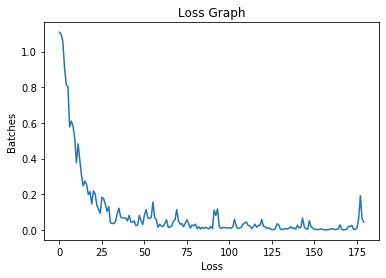

In [8]:

plt.plot(loss_array)
plt.title('Loss Graph')
plt.xlabel('Loss')
plt.ylabel('Batches')
plt.show()

In [9]:
PATH = './trained_final_submission.pth'
torch.save(net.state_dict(), PATH)

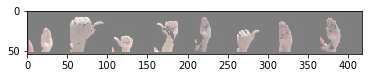

GroundTruth:   stop  next  prev  prev


In [10]:
dataiter2 = iter(testloader2)
images2, labels2 = dataiter2.next()

# print images
imshow(torchvision.utils.make_grid(images2))
print('GroundTruth: ', ' '.join('%5s' % classes[labels2[j]] for j in range(4)))

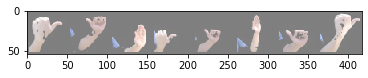

GroundTruth:   next  prev  stop  next


In [11]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [12]:
net = Net()
net.load_state_dict(torch.load(PATH))
net.eval()

Net(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1936, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=3, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [13]:
outputs2 = net(images2)
_, predicted2 = torch.max(outputs2, 1)

In [14]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

In [15]:
print('Predicted: ', ' '.join('%5s' % classes[predicted2[j]]
                              for j in range(4)))

Predicted:   stop  next  prev  prev


In [16]:
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   next  prev  stop  next


In [17]:
correct2 = 0
total2 = 0
with torch.no_grad():
    for data in testloader2:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total2 += labels.size(0)
        correct2 += (predicted == labels).sum().item()

print('Accuracy of the network on the  test images: %d %%' % (
    100 * correct2 / total2))
print(correct2)
print(total2)

Accuracy of the network on the  test images: 97 %
2404
2466


In [18]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the  test images: %d %%' % (
    100 * correct / total))
print(correct)
print(total)

Accuracy of the network on the  test images: 98 %
1184
1202
